<a href="https://colab.research.google.com/github/Durgeshwagh1975/Soft-Computing-Programs/blob/main/Implement_defuzzification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Implement defuzzification (Max-membership principle, Centroid method, Weighted average method).

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 19.2 MB/s eta 0:00:00
Shape of x: (101,)
Shape of mfx: (101,)


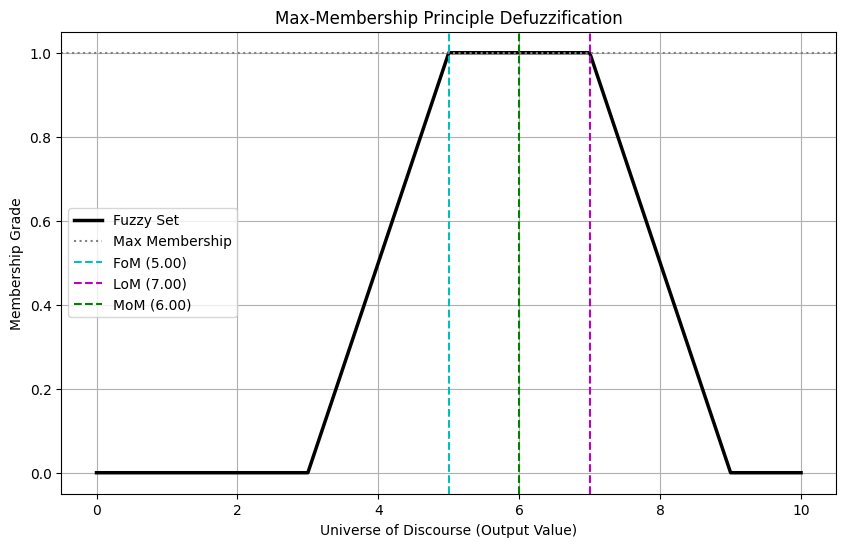

In [1]:
!pip install scikit-fuzzy
import numpy as np

import skfuzzy as fuzz

import matplotlib.pyplot as plt


# 1. Define the universe of discourse for the output variable.

# `np.arange` creates a NumPy array. Here, it will produce 101 elements from 0 to 10.

x = np.arange(0, 10.1, 0.1)


# 2. Define the trapezoidal fuzzy membership function.

# The parameters [a, b, c, d] must be within the range of x.

# For example, [3, 5, 7, 9] will fit within the universe of discourse [0, 10.1].

abcd = [3, 5, 7, 9]

mfx = fuzz.trapmf(x, abcd)


# 3. Verify the dimensions match before plotting.

print(f"Shape of x: {x.shape}")

print(f"Shape of mfx: {mfx.shape}")


# 4. Defuzzify and plot as before.

fom_val = fuzz.defuzz(x, mfx, 'som')

lom_val = fuzz.defuzz(x, mfx, 'lom')

mom_val = fuzz.defuzz(x, mfx, 'mom')


fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(x, mfx, 'k', linewidth=2.5, label='Fuzzy Set')


max_membership = np.max(mfx)

ax.axhline(y=max_membership, color='gray', linestyle=':', label='Max Membership')


height_fom = fuzz.interp_membership(x, mfx, fom_val)

height_lom = fuzz.interp_membership(x, mfx, lom_val)

height_mom = fuzz.interp_membership(x, mfx, mom_val)


ax.axvline(x=fom_val, ymax=height_fom, color='c', linestyle='--', label=f'FoM ({fom_val:.2f})')

ax.axvline(x=lom_val, ymax=height_lom, color='m', linestyle='--', label=f'LoM ({lom_val:.2f})')

ax.axvline(x=mom_val, ymax=height_mom, color='g', linestyle='--', label=f'MoM ({mom_val:.2f})')


ax.set_title('Max-Membership Principle Defuzzification')

ax.set_xlabel('Universe of Discourse (Output Value)')

ax.set_ylabel('Membership Grade')

ax.legend()

ax.grid(True)

plt.show()

The defuzzified centroid value is: 5.00


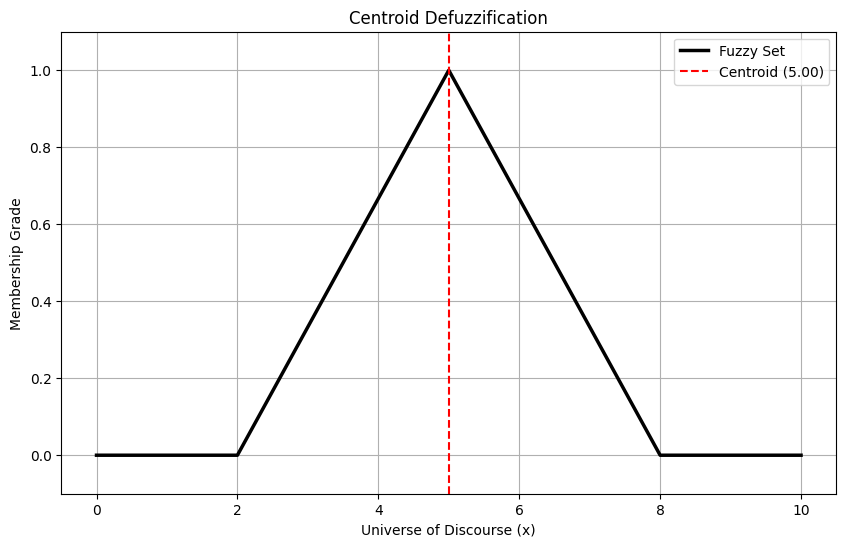

In [2]:
import numpy as np

import skfuzzy as fuzz

import matplotlib.pyplot as plt


# 1. Define the universe of discourse (x-axis)

# This creates a NumPy array from 0 to 10 with a step of 0.1, giving 101 points.

x = np.arange(0, 10.1, 0.1)


# 2. Define a fuzzy membership function (y-axis)

# For example, a triangular membership function. The parameters [a, b, c]

# must fall within the range of x.

mfx = fuzz.trimf(x, [2, 5, 8])


# 3. Calculate the centroid

# The `fuzz.defuzz()` function takes the x-range, the membership values,

# and the defuzzification method as arguments.

centroid_value = fuzz.defuzz(x, mfx, 'centroid')


print(f"The defuzzified centroid value is: {centroid_value:.2f}")


# 4. Plot the fuzzy set and its centroid

fig, ax = plt.subplots(figsize=(10, 6))


# Plot the fuzzy membership function

ax.plot(x, mfx, 'k', linewidth=2.5, label='Fuzzy Set')


# Get the membership value at the centroid for plotting the line

height_centroid = fuzz.interp_membership(x, mfx, centroid_value)


# Plot a vertical dashed line at the centroid value

ax.axvline(x=centroid_value, ymax=height_centroid, color='r', linestyle='--',

label=f'Centroid ({centroid_value:.2f})')


# Add labels, title, legend, and a grid for clarity

ax.set_title('Centroid Defuzzification')

ax.set_xlabel('Universe of Discourse (x)')

ax.set_ylabel('Membership Grade')

ax.set_ylim(-0.1, 1.1)

ax.legend()

ax.grid(True)


# Display the plot

plt.show()

The defuzzified weighted average is: 5.33


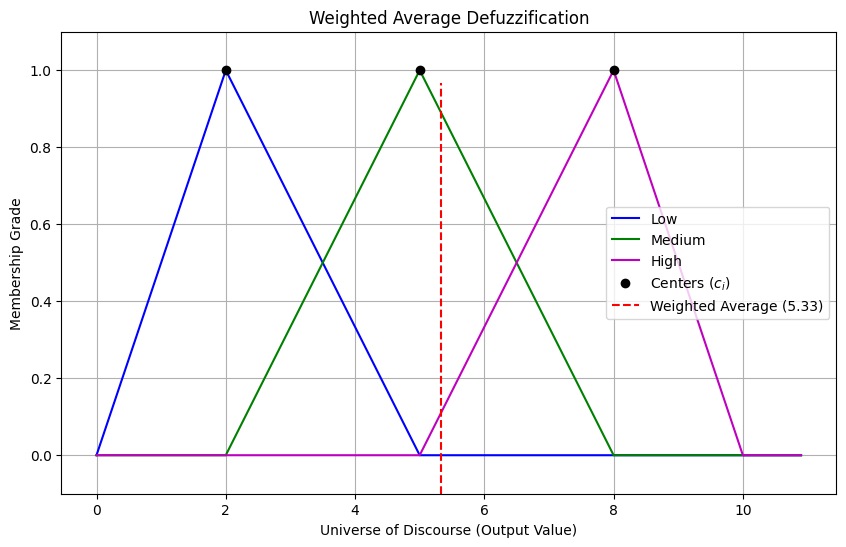

In [3]:
import numpy as np

import skfuzzy as fuzz

import matplotlib.pyplot as plt


# 1. Define the universe of discourse (x-axis)

x = np.arange(0, 11, 0.1)


# 2. Define the centers and weights

centers = np.array([2, 5, 8])

weights = np.array([0.4, 0.8, 0.6])


# 3. Calculate the weighted average

weighted_average = np.sum(centers * weights) / np.sum(weights)


print(f"The defuzzified weighted average is: {weighted_average:.2f}")


# 4. Define the symmetrical output membership functions with their 'abc' parameters

# Each abc tuple specifies the start, center, and end of the triangle.

low_mf = fuzz.trimf(x, [0, 2, 5])

medium_mf = fuzz.trimf(x, [2, 5, 8])

high_mf = fuzz.trimf(x, [5, 8, 10])


# 5. Visualize the result

fig, ax = plt.subplots(figsize=(10, 6))


# Plot each fuzzy set

ax.plot(x, low_mf, 'b', linewidth=1.5, label='Low')

ax.plot(x, medium_mf, 'g', linewidth=1.5, label='Medium')

ax.plot(x, high_mf, 'm', linewidth=1.5, label='High')


# Plot the center of each function

ax.plot(centers, np.array([1, 1, 1]), 'ko', label='Centers ($c_i$)')


# Plot the weighted average result as a vertical dashed line

height_wa = fuzz.interp_membership(x, medium_mf, weighted_average) # Use one of the MFs for height

ax.axvline(x=weighted_average, ymax=height_wa, color='r', linestyle='--',

label=f'Weighted Average ({weighted_average:.2f})')


# Add labels, title, and legend

ax.set_title('Weighted Average Defuzzification')

ax.set_xlabel('Universe of Discourse (Output Value)')

ax.set_ylabel('Membership Grade')

ax.set_ylim(-0.1, 1.1)

ax.legend()

ax.grid(True)


plt.show()